In [1]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df['sex'] = df['sex'].map({'male':0, 'female':1})
df['smoker'] = df['smoker'].map({'yes':1, 'no':0})
df['region'] = pd.factorize(df['region'])[0]
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
model = GradientBoostingRegressor().fit(X_train, y_train)
preds = model.predict(X_test)

In [5]:
import os
os.makedirs('figures', exist_ok=True)
os.makedirs('excel_files', exist_ok=True)

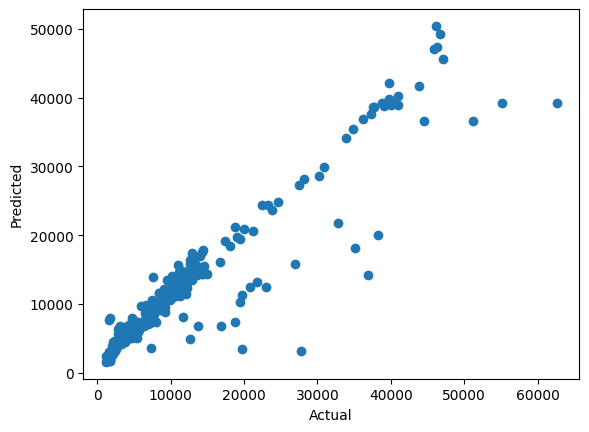

In [6]:
plt.scatter(y_test, preds)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.savefig('figures/insurance_scatter.png')
plt.show()

In [8]:
with pd.ExcelWriter('excel_files/insurance_forecast.xlsx') as writer:
    # Save predictions vs actual
    pd.DataFrame({'Actual': y_test, 'Pred': preds}).to_excel(writer, sheet_name='Predictions')
    
    # Save MSE — FIXED: wrap the squared expression in parentheses
    mse = ((y_test - preds) ** 2).mean()
    pd.DataFrame({'MSE': [mse]}).to_excel(writer, sheet_name='Metrics')